In [95]:
import numpy as np
import gzip
import matplotlib.pyplot as plt
from astropy.io import fits as fits
from astropy.stats import sigma_clip
import lightkurve as lk
from lightkurve import SFFCorrector
from lightkurve import search_tesscut
import astropy.units as u
from astropy import stats
import time as datetime
from lightkurve import periodogram
from astropy.convolution import Box1DKernel, convolve
from tqdm import tqdm_notebook as tqdm
import numpy.linalg as lin
import scipy.linalg as sclin
from scipy import stats as st
import pandas as pd

from lightkurve import search_targetpixelfile

from scipy import ndimage as nd
import re
plt.rcParams.update({'figure.max_open_warning': 0})
import warnings
warnings.filterwarnings("ignore")

#Import all needed packages 

In [2]:
cd /Users/hamil/Documents/TESSFiles 

C:\Users\hamil\Documents\TESSFiles


In [120]:
cand1 = gzip.open('/Users/hamil/Documents/TESSFiles/tess2018206045859-s0001-0000000031273263-0120-s_tp.fits.gz', 'rb')
cand2 = gzip.open('/Users/hamil/Documents/TESSFiles/tess2018234235059-s0002-0000000031273263-0121-s_tp.fits.gz', 'rb')

In [171]:
tpf1 = search_targetpixelfile('TIC 31273263', sector= 1).download()
tpf2 = search_targetpixelfile('TIC 31273263', sector= 2).download()
tpf3 = search_targetpixelfile('TIC 31928890', sector= 1).download()
tpf4 = search_targetpixelfile('TIC 31928890', sector= 2).download()
tpf5 = search_targetpixelfile('TIC 31963492', sector= 1).download()
tpf6 = search_targetpixelfile('TIC 31963492', sector= 1).download()

KeyboardInterrupt: 

'\ncorrector1 = lk.RegressionCorrector(raw_lc1)\ncorrected_lc1 = corrector1.correct(dm)\ncorrected_lc1.plot()\ncorrector1.model_lc\n\nmodel1 = corrector1.model_lc\nmodel1.plot()\nmodel1 -= np.percentile(model.flux, 5)\n\ncorrected_lc1 = raw_lc1 - model1\ncorrected_lc1.plot()\n'

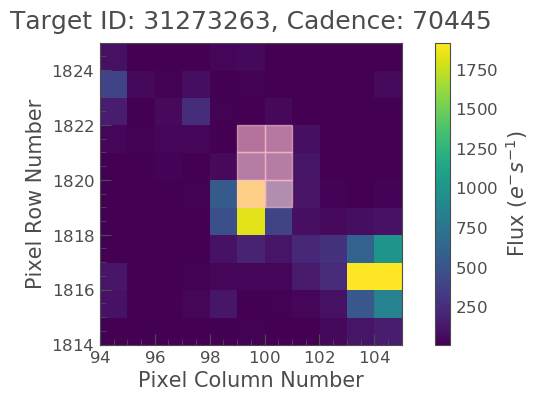

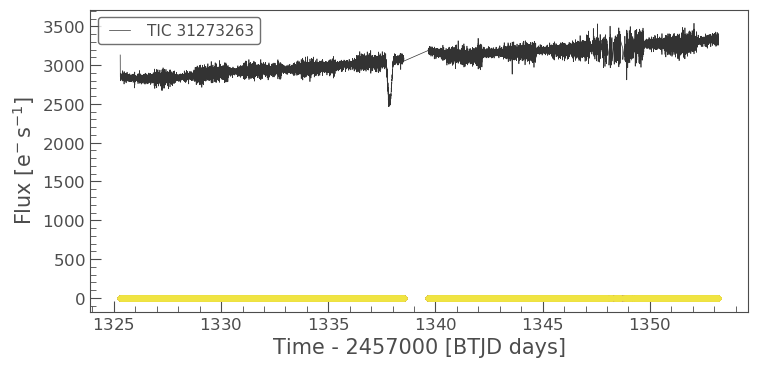

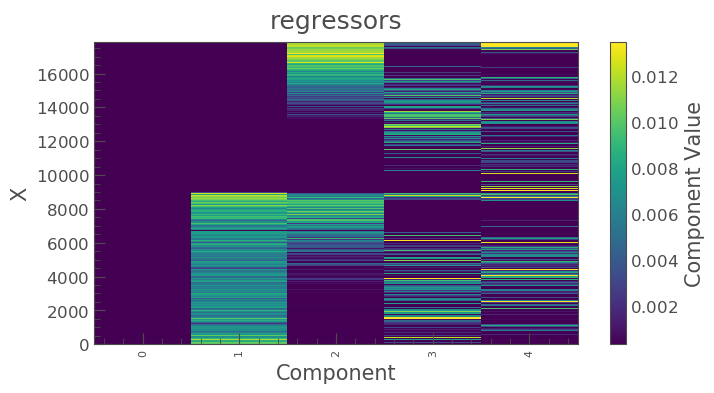

In [145]:
tpf1 = search_targetpixelfile('TIC 31273263', sector= 1).download()
#tpf = lk.search_tesscut(target, sector=15).download(cutout_size=(50, 49))
aper1 = tpf.create_threshold_mask()
tpf1.plot(aperture_mask=aper1)
raw_lc1 = tpf1.to_lightcurve(aperture_mask=aper1)
raw_lc1.plot()

regressors1 = tpf1.flux[:, ~aper1]
regressors1.shape
dm1 = lk.DesignMatrix(regressors1, name='regressors')
dm1 = dm1.pca(5)

plt.plot(tpf1.time, dm1.values + np.arange(5)*0.2, '.')
dm1.plot()

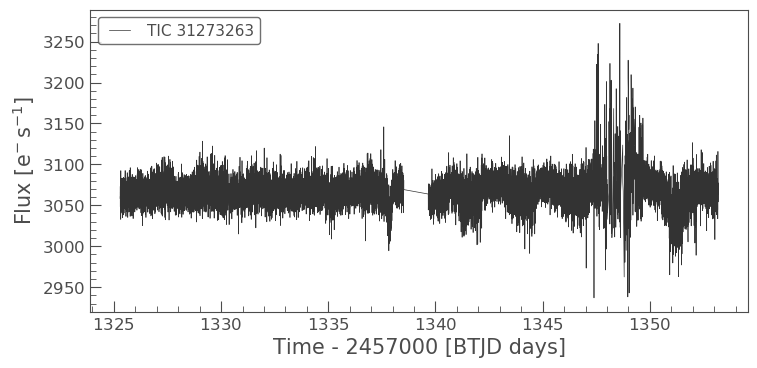

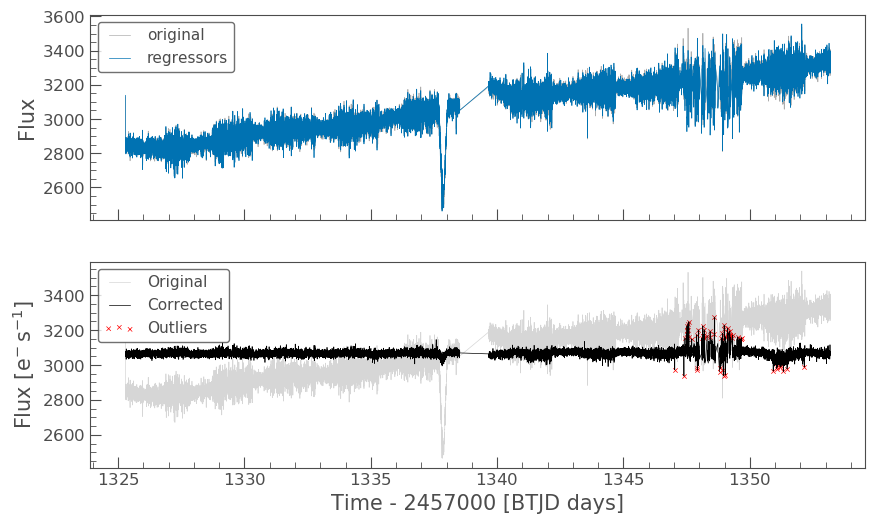

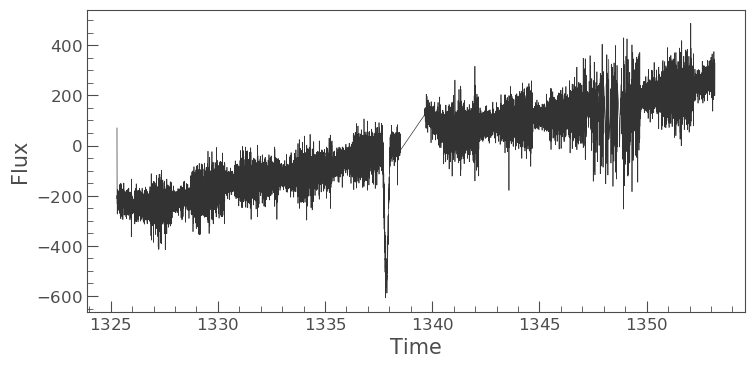

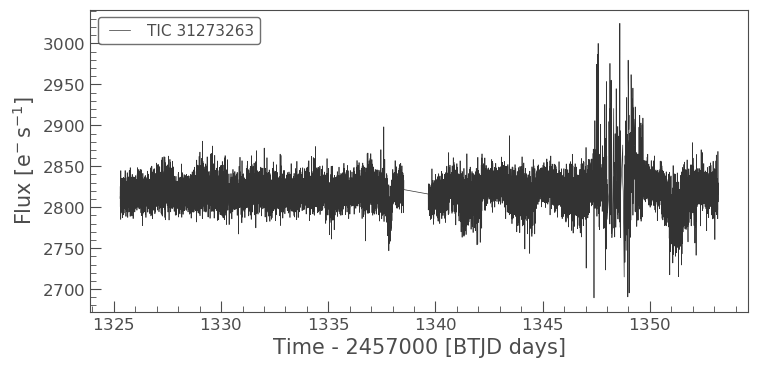

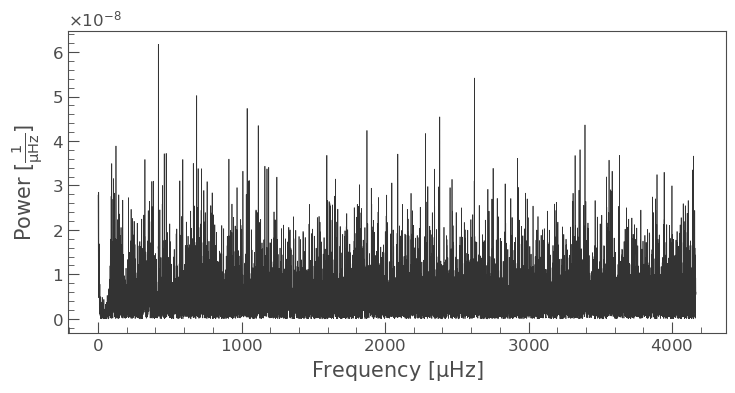

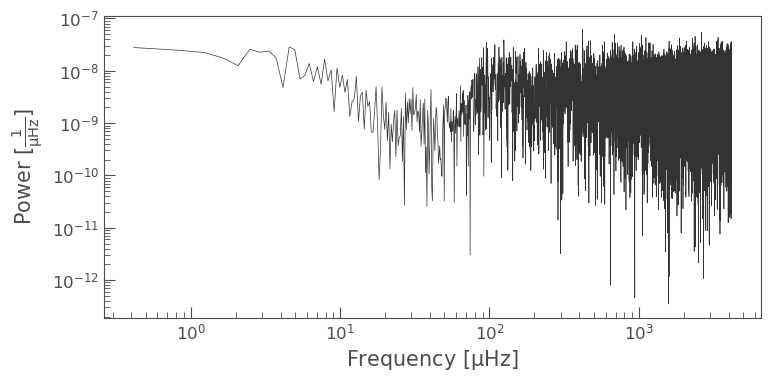

In [153]:
corrector1 = lk.RegressionCorrector(raw_lc1)
corrected_lc1 = corrector1.correct(dm1)
corrected_lc1.plot()

corrector1.diagnose()

model1 = corrector1.model_lc
model1.plot()
model1 -= np.percentile(model1.flux, 5)

corrected_lc1 = raw_lc1 - model1
corrected_lc1.plot()
flux = corrected_lc1.flux
time = corrected_lc1.time
condition = ((time > 1347) & (time < 1350))
flux[condition] = np.median(flux)
lc1 = lk.LightCurve(time,flux).remove_nans().remove_outliers().flatten(window_length=145)

power1 = lc1.to_periodogram(method='lombscargle', normalization="psd")
power1.plot()
power1.plot(scale='log')

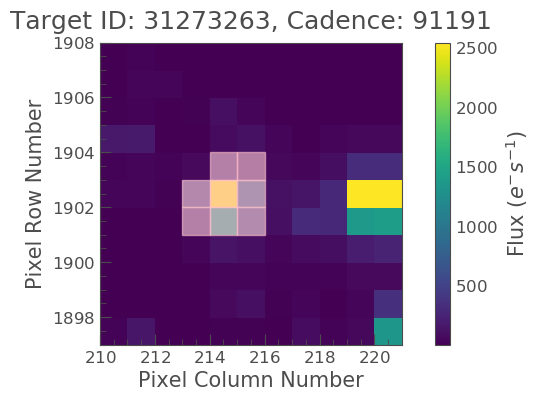

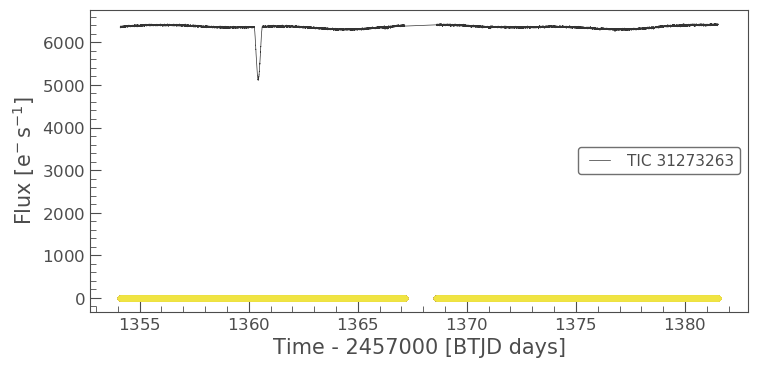

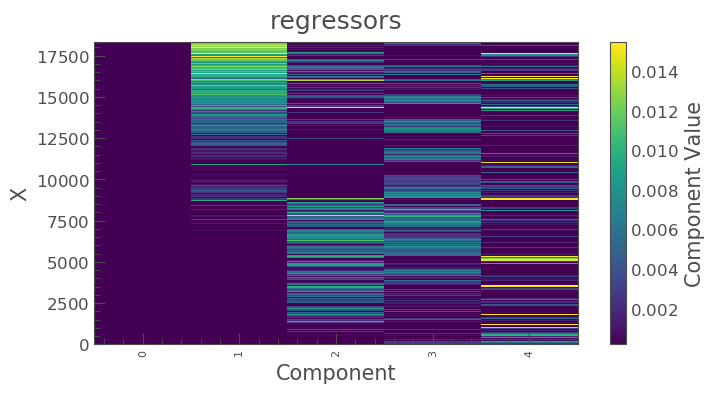

In [161]:
tpf2 = search_targetpixelfile('TIC 31273263', sector= 2).download()
aper2 = tpf2.create_threshold_mask()
tpf2.plot(aperture_mask=aper2)
raw_lc2 = tpf2.to_lightcurve(aperture_mask=aper2)
raw_lc2.plot()

regressors2 = tpf2.flux[:, ~aper2]
regressors2.shape
dm2 = lk.DesignMatrix(regressors2, name='regressors')
dm2 = dm2.pca(5)

plt.plot(tpf2.time, dm2.values + np.arange(5)*0.2, '.')
dm2.plot()

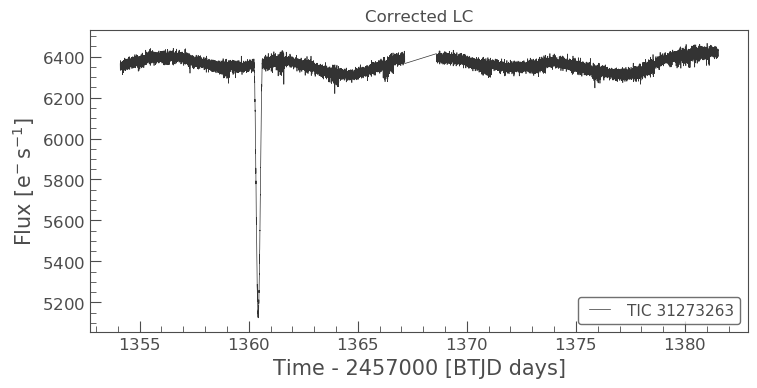

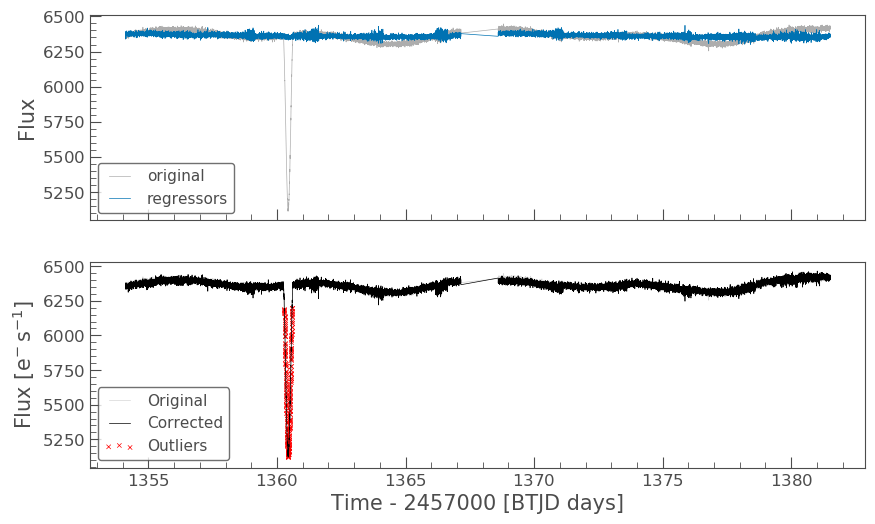

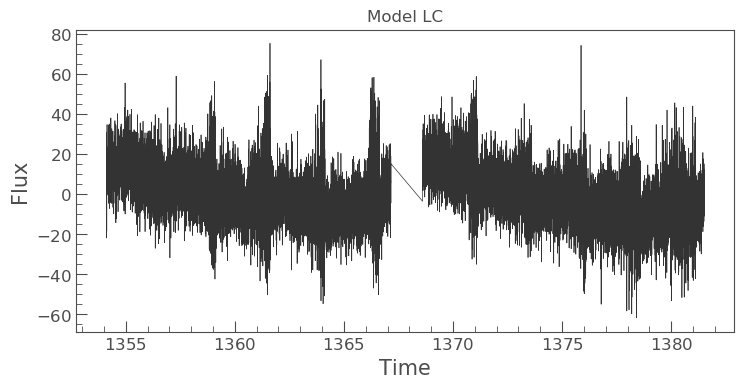

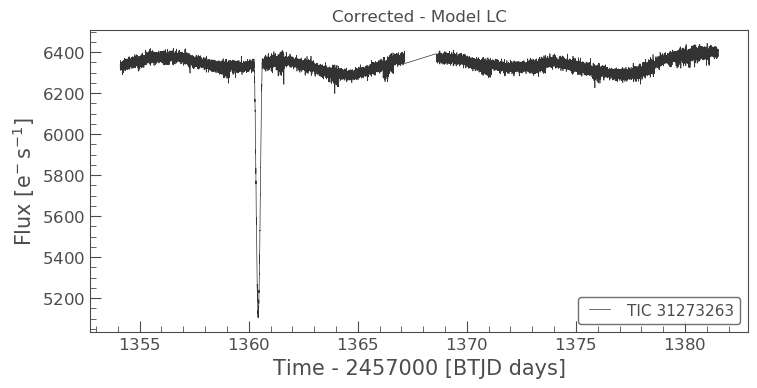

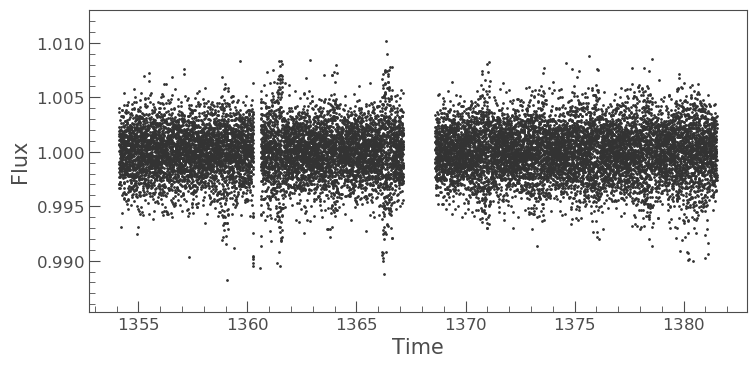

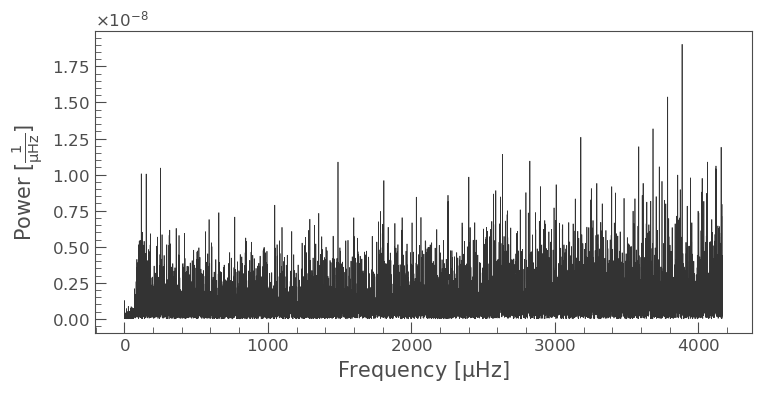

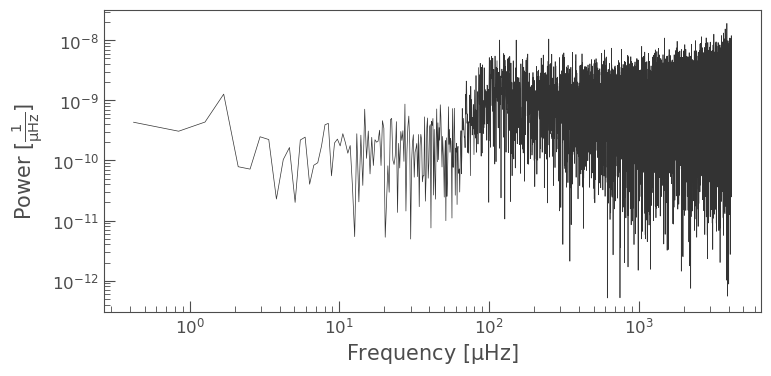

In [169]:
corrector2 = lk.RegressionCorrector(raw_lc2)
corrected_lc2 = corrector2.correct(dm2)
corrected_lc2.plot()
plt.title('Corrected LC')
corrector2.diagnose()

model2 = corrector2.model_lc
model2.plot()
plt.title('Model LC')
model2 -= np.percentile(model2.flux, 5)

corrected_lc2 = raw_lc2 - model2
corrected_lc2.plot()
plt.title('Corrected - Model LC')
flux2 = corrected_lc2.flux
time2 = corrected_lc2.time
condition = ((time2 > 1347) & (time2 < 1350))
flux2[condition] = np.median(flux2)
lc2 = lk.LightCurve(time2,flux2).remove_nans().remove_outliers(sigma_lower=3, sigma_upper=3).flatten(window_length=145)
lc2.scatter()
power2 = lc2.to_periodogram(method='lombscargle', normalization="psd")
power2.plot()
power2.plot(scale='log')

In [170]:
tpf3 = search_targetpixelfile('TIC 31928890', sector= 1).download()
aper3 = tpf3.create_threshold_mask()
tpf3.plot(aperture_mask=aper3)
raw_lc3 = tpf3.to_lightcurve(aperture_mask=aper3)
raw_lc3.plot()

#regressors3 = tpf3.flux[:, ~aper3]
#regressors3.shape
#dm3 = lk.DesignMatrix(regressors3, name='regressors')
#dm3 = dm3.pca(5)

#plt.plot(tpf3.time, dm3.values + np.arange(5)*0.2, '.')
#dm3.plot()

AttributeError: 'NoneType' object has no attribute 'create_threshold_mask'

In [ ]:
corrector3 = lk.RegressionCorrector(raw_lc3)
corrected_lc3 = corrector3.correct(dm3)
corrected_lc3.plot()
plt.title('Corrected LC')
corrector3.diagnose()

model3 = corrector3.model_lc
model3.plot()
model3 -= np.percentile(model3.flux, 5)
plt.title('Model LC')
corrected_lc3 = raw_lc3 - model3
corrected_lc3.plot()
plt.title('Corrected - Model LC')
flux3 = corrected_lc3.flux
time3 = corrected_lc3.time
condition = ((time3 > 1347) & (time3 < 1350))
flux3[condition] = np.median(flux3)
lc3 = lk.LightCurve(time3,flux3).remove_nans().remove_outliers().flatten(window_length=145)

power3 = lc3.to_periodogram(method='lombscargle', normalization="psd")
power3.plot()
power3.plot(scale='log')